In [2]:
import starktools as st
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt


In [3]:
def lookup_eigenvalue(n, m, nmin, nmax, q=0, qind=0):
    """
    Looks up the diagnol index of the state matrix (or index of eigen value)
    From the principle quantum number (n) and azimuthal quantum number (m).

    Args:
        n (int): Principle quantum number
        m (int): Azimuthal quantum numebr
        nmin (int): Minimum value in principle quantum number used to
                    build matrix.
        nmax (int): Maximum value in principle quantum number used to
                    build matrix.

    Returns:
        i (int): Index of matrix or eigenvalue.
    """

    if (q==0):
        nmin = nmin -1
        n = n - 1 # Python index starts from zero
        
        i = 1/2 * n * (n+1) - 1/2 * nmin * (nmin+1)

        i = i + m

        return int(i)
    
    else:
        
        # Python index starts from zero
        i = 1/2 * n * (n-1)*(2*q+1) - 1/2 * nmin * (nmin-1)*(2*q+1)

        i = i + m*(2*q+1)  + q + qind

        return int(i)

In [4]:
# Defects for Hydrogen
defects = {
        0 : [0.29665648771, 0.038296666, 0.0075131, -0.0045476],
        1 : [0.06836028379, -0.018629228, -0.01233275, -0.0079527],
        2 : [0.002891328825, -0.006357704, 0.0003367, 0.0008395],
        3 : [0.00044737927, -0.001739217, 0.00010478, 3.31e-05],
        4 : [0.00012714167, -0.000796484, -9.85e-06, -1.9e-05],
        5 : [4.8729846e-05, -0.0004332281, -8.1e-06, 0],
        6 : [2.3047609e-05, -0.0002610672, -4.04e-06, 0]
}

In [5]:
def map_maker(m0_array, mH_array, field):
    fsteps = field.shape[0]
    neig = m0_array.shape[0]
    
    vals = np.zeros((fsteps, neig))
    for i in range(fsteps):
        fau = field[i] / st.Constants.F_He
        val = (scipy.linalg.eigh(m0_array + mH_array*fau, eigvals_only=True) * st.Constants.E_He/st.Constants.h)
        for j in range(neig):
            vals[i,j] = val[j]
    return vals

In [6]:
nmin = 54
nmax = 57
m0 = st.MatrixH0(nmin, nmax, defects)
mH = st.MatrixHs(nmin, nmax, defects)
field = np.linspace(0, 100, 20)# V /m

In [7]:
v = map_maker(np.asarray(m0), np.asarray(mH), field)

In [8]:
vals = []
for i in range(v.shape[0]):
    vals.append(v[i])

In [10]:
ind55s = lookup_eigenvalue(55, 0, nmin, nmax)
ind56s = lookup_eigenvalue(56, 0, nmin, nmax)
print(v[:,ind55s][0])
print(v[:,ind56s][0])

-1099228472064.9489
-1060115473616.9417


(-1105.0, -1040.0)

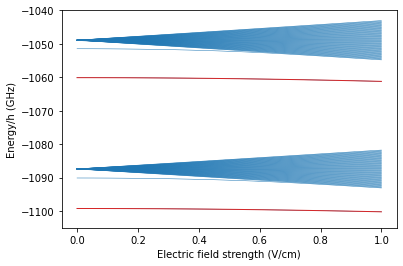

In [11]:
plt.plot(field*0.01, np.array(vals)/10**9, c='tab:blue', linewidth=0.5)
plt.plot(field*0.01 , v[:,ind55s]/10**9, c='tab:red', linewidth=1)
plt.plot(field*0.01 , v[:,ind56s]/10**9, c='tab:red', linewidth=1)
plt.xlabel('Electric field strength (V/cm)')
plt.ylabel('Energy/h (GHz)')
plt.ylim([-1.105e3, -1.04e3])